In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import time

/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:186: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'n

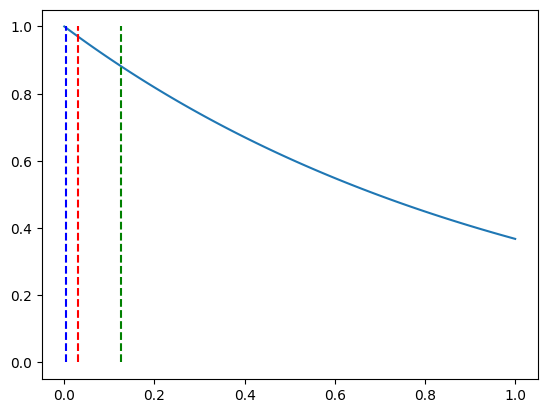

In [2]:
def f(x):
    return np.e**(-x)

x = np.linspace(0, 1, 100)
y = f(x)
plt.plot(x, y)
plt.plot([1/32, 1/32], [0, 1], 'r--')
plt.plot([1/256, 1/256], [0, 1], 'b--')
plt.plot([1/8, 1/8], [0, 1], 'g--')

In [3]:
# X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
# X = minmax_scale(X)
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = np.array(X)
y = np.array(y)
X = X.astype('float32') / 255.
y = y.astype('int')
X, _, y, _ = train_test_split(X, y, train_size=5000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

/home/peyote/.conda/envs/tf3.11/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

# PPinv = SSNP()
PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), RBFinv())
# PPinv = PPinvWrapper(UMAP(n_components=2, random_state=0), Pinv_ilamp())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

device:  cuda:0


/home/peyote/.conda/envs/tf3.11/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Epoch 1/150, Loss: 0.09498794
Epoch 2/150, Loss: 0.06600396
Epoch 3/150, Loss: 0.05931429
Epoch 4/150, Loss: 0.05541199
Epoch 5/150, Loss: 0.05208576
Epoch 6/150, Loss: 0.05008149
Epoch 7/150, Loss: 0.04852537
Epoch 8/150, Loss: 0.04711462
Epoch 9/150, Loss: 0.04588673
Epoch 10/150, Loss: 0.04499427
Epoch 11/150, Loss: 0.04432905
Epoch 12/150, Loss: 0.04377161
Epoch 13/150, Loss: 0.04328060
Epoch 14/150, Loss: 0.04283561
Epoch 15/150, Loss: 0.04244562
Epoch 16/150, Loss: 0.04209677
Epoch 17/150, Loss: 0.04177166
Epoch 18/150, Loss: 0.04148412
Epoch 19/150, Loss: 0.04118269
Epoch 20/150, Loss: 0.04095175
Epoch 21/150, Loss: 0.04070566
Epoch 22/150, Loss: 0.04047133
Epoch 23/150, Loss: 0.04028450
Epoch 24/150, Loss: 0.04010100
Epoch 25/150, Loss: 0.03988950
Epoch 26/150, Loss: 0.03973875
Epoch 27/150, Loss: 0.03958774
Epoch 28/150, Loss: 0.03942333
Epoch 29/150, Loss: 0.03929072
Epoch 30/150, Loss: 0.03914099
Epoch 31/150, Loss: 0.03907240
Epoch 32/150, Loss: 0.03894442
Epoch 33/150, Los

In [5]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 10


Loss: 1.4770: 100%|██████████| 150/150 [00:05<00:00, 26.63it/s]


fast strategy
time accumulative: 0.0026645660400390625
time accumulative2: 0.016353607177734375
time called: 18
time total: 0.6598432064056396
fast strategy
threshold_abs: 21.787817382812502
initial windows time: 0.41523051261901855
time_acc: 0.0006575584411621094 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0006575584411621094
time accumulative2: 0.04642891883850098
time called: 12
time total: 0.5175967216491699
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


time accumulative: 0.0027227401733398438
time accumulative2: 0.024146318435668945
time called: 19
time total: 1.7469711303710938
fast strategy
threshold_abs: 1.1915545504125649
initial windows time: 0.09770464897155762
time_acc: 0.0022513866424560547 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0022513866424560547
time accumulative2: 0.019136667251586914
time called: 5
time total: 0.4620697498321533


<Axes: title={'center': 'label'}>

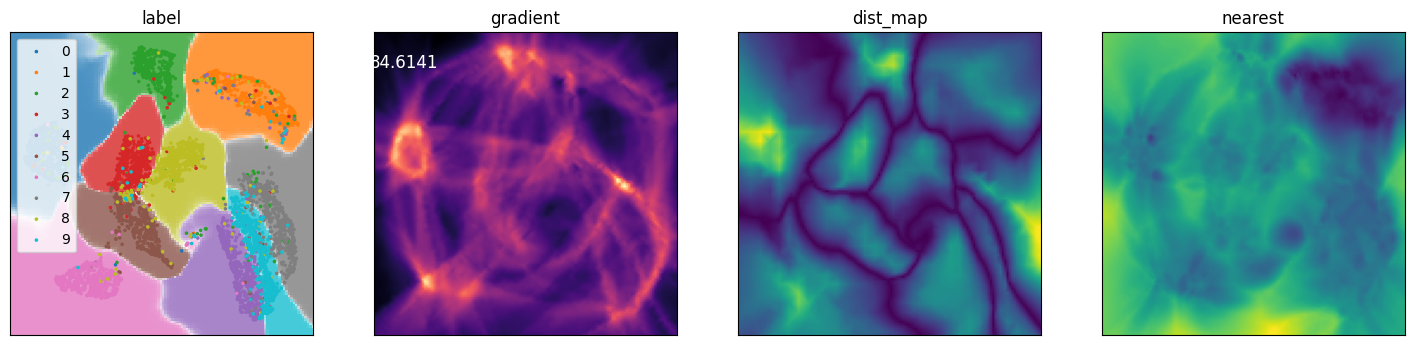

In [6]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

In [7]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
time accumulative: 0.00031256675720214844
time accumulative2: 0.050519704818725586
time called: 1
time total: 0.0661768913269043
slow strategy
time accumulative: 0.0002713203430175781
time accumulative2: 0.04033684730529785
time called: 1
time total: 0.14751219749450684
slow strategy
time accumulative: 0.0003139972686767578
time accumulative2: 0.03637099266052246
time called: 1
time total: 5.407329082489014
slow strategy
time accumulative: 0.0002510547637939453
time accumulative2: 0.05096626281738281
time called: 1
time total: 0.7789199352264404


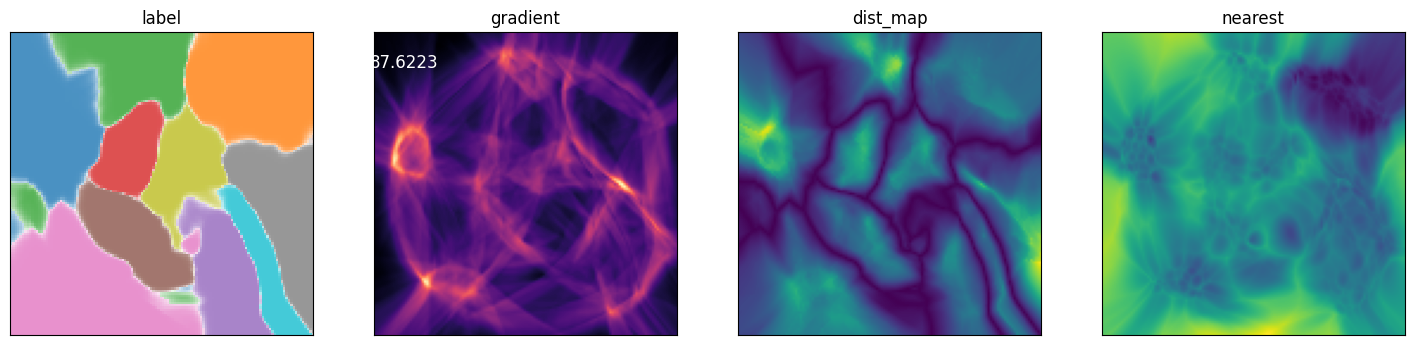

In [8]:
conten_list = ['label', 'gradient',  'dist_map', 'nearest',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

slow strategy
time accumulative: 0.0013017654418945312
time accumulative2: 0.4449319839477539
time called: 1
time total: 18.124395608901978
fast strategy
relace the label with the dist_map


/home/yuwang/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


time accumulative: 0.005685329437255859
time accumulative2: 0.12992191314697266
time called: 25
time total: 3.9315497875213623


[]

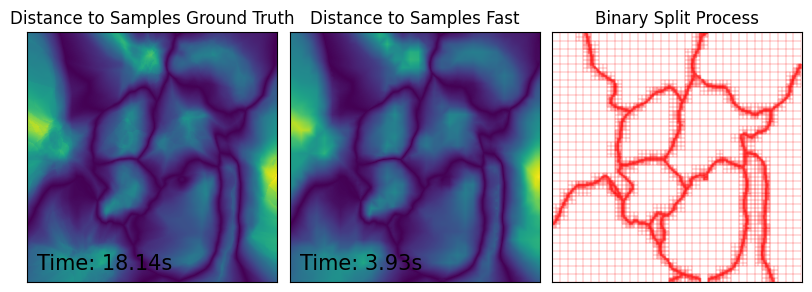

In [6]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='dist_map')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='dist_map', threshold=0.1)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.04, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='k')
ax[1].text(0.04, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='k')

ax[0].set_title('Distance to Samples Ground Truth')
ax[1].set_title('Distance to Samples Fast')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

t = 0
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(-1, GRID), ylim=(-1, GRID))
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('figures/near2neighor.pdf', dpi=300)

# fig.savefig('results/figures/dist_map_umap_ssnp_t015.eps', dpi=300)
# fig.savefig('results/figures/dist_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy
time accumulative: 0.0007655620574951172
time accumulative2: 0.18294453620910645
time called: 1
time total: 18.594871520996094
fast strategy
threshold_abs: 0.23862583637237547
initial windows time: 0.3782386779785156
time_acc: 0.006662130355834961 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.006662130355834961
time accumulative2: 0.04820704460144043
time called: 6
time total: 6.727909564971924


[]

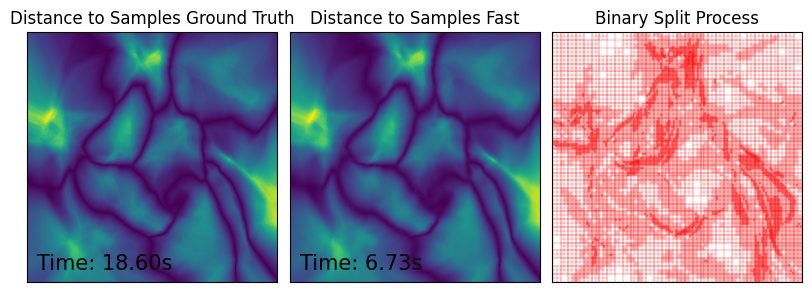

In [7]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='dist_map_general')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='dist_map_general', threshold=0.15)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.04, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='k')
ax[1].text(0.04, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='k')

ax[0].set_title('Distance to Samples Ground Truth')
ax[1].set_title('Distance to Samples Fast')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

t = 0
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(-1, GRID), ylim=(-1, GRID))
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('figures/near2neighor.pdf', dpi=300)

# fig.savefig('results/figures/dist_map_umap_ssnp_t015.eps', dpi=300)
# fig.savefig('results/figures/dist_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy


time accumulative: 0.0007398128509521484
time accumulative2: 0.19979476928710938
time called: 1
time total: 2.71551251411438
fast strategy
threshold_abs: 0.6020679973548497
initial windows time: 0.07451558113098145
time_acc: 0.006699562072753906 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.006699562072753906
time accumulative2: 0.05123329162597656
time called: 6
time total: 1.415442943572998


[]

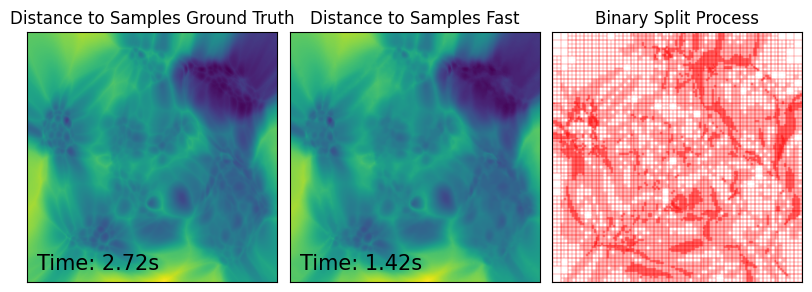

In [9]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 256

time0 = time.time()
builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
time1 = time.time()
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.1)
time2 = time.time()
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

ax[0].text(0.04, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='k')
ax[1].text(0.04, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='k')

ax[0].set_title('Distance to Samples Ground Truth')
ax[1].set_title('Distance to Samples Fast')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

t = 0
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(-1, GRID), ylim=(-1, GRID))
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('figures/near2neighor.pdf', dpi=300)

# fig.savefig('results/figures/dist_map_umap_ssnp_t015.eps', dpi=300)
# fig.savefig('results/figures/dist_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy
time accumulative: 0.0029036998748779297
time accumulative2: 0.754265546798706
time called: 1
time total: 1.8713157176971436
1.8723862171173096
fast strategy
threshold_abs: 35.63591003417969
initial windows time: 0.027204036712646484
time_acc: 0.0013194084167480469 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0013194084167480469
time accumulative2: 0.134246826171875
time called: 6
time total: 1.045203685760498
1.046407699584961


[]

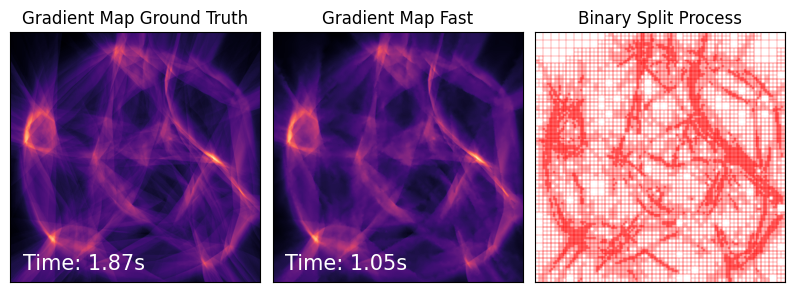

In [10]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(10, 3.8))
fig.subplots_adjust(wspace=0.05, hspace=0.03)
GRID = 512
threshold = 0.125
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID, plot_mean=False)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, plot_mean=False, reduced=True) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.05, 0.05, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.05, 0.05, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
ax[2].set_title('Binary Split Process')
ax[2].set_aspect('equal')

t = 1
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[2].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[2].set(xlim=(0-1, GRID), ylim=(0-1, GRID))
# ax[2].axis('off')
ax[2].set_xticks([])
ax[2].set_yticks([])

# fig.savefig('results/figures/grad_map_ssnp_mnist_t015.eps', dpi=300)

# fig.savefig('results/figures/grad_map_umap_nninv_mnist.pdf', dpi=300)

slow strategy
time accumulative: 0.0007469654083251953
time accumulative2: 0.1903529167175293
time called: 1
time total: 0.44458866119384766
0.4456346035003662
fast strategy
threshold_abs: 36.62179870605468
initial windows time: 0.014016389846801758
time_acc: 0.003615856170654297 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.003615856170654297
time accumulative2: 0.23091363906860352
time called: 24
time total: 0.6248860359191895
0.6258726119995117


[(-5.0, 257.0), (-5.0, 257.0)]

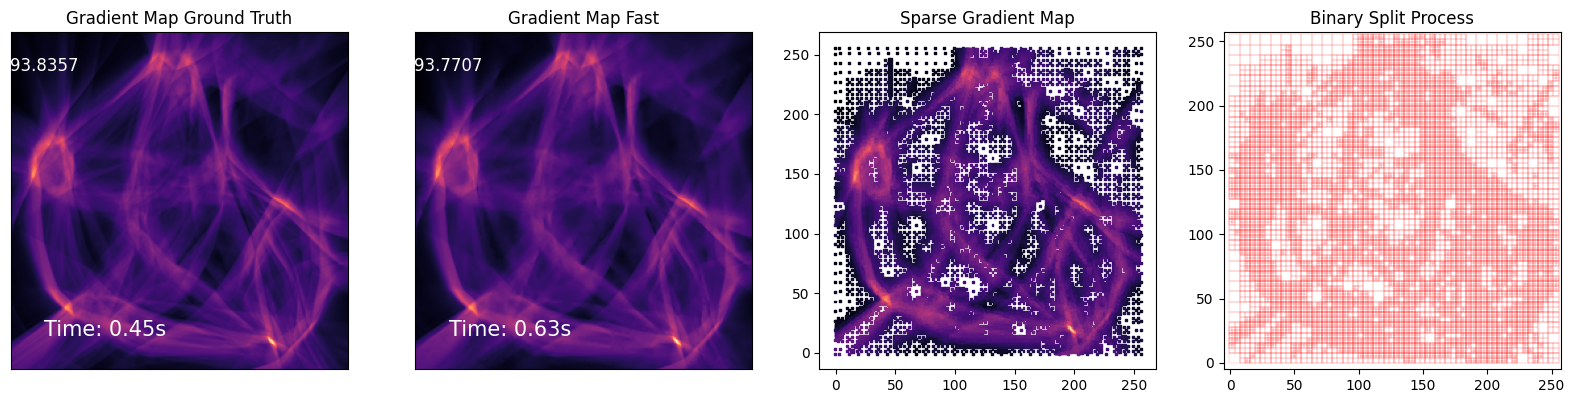

In [11]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
GRID = 256
threshold = 0.15
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

t = 1
for item in sparse:
    if item[-2] > t and item[-1] > t:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))

# fig.savefig('figures/grad_map.pdf', dpi=300)


slow strategy
time accumulative: 0.0008931159973144531
time accumulative2: 0.13310694694519043
time called: 1
time total: 0.37671637535095215
0.3778986930847168
fast strategy
threshold_abs: 38.08876419067383
initial windows time: 0.028525114059448242
time_acc: 0.0008475780487060547 !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
time accumulative: 0.0008475780487060547
time accumulative2: 0.06878066062927246
time called: 5
time total: 0.6794495582580566
0.6806190013885498


[(-5.0, 257.0), (-5.0, 257.0)]

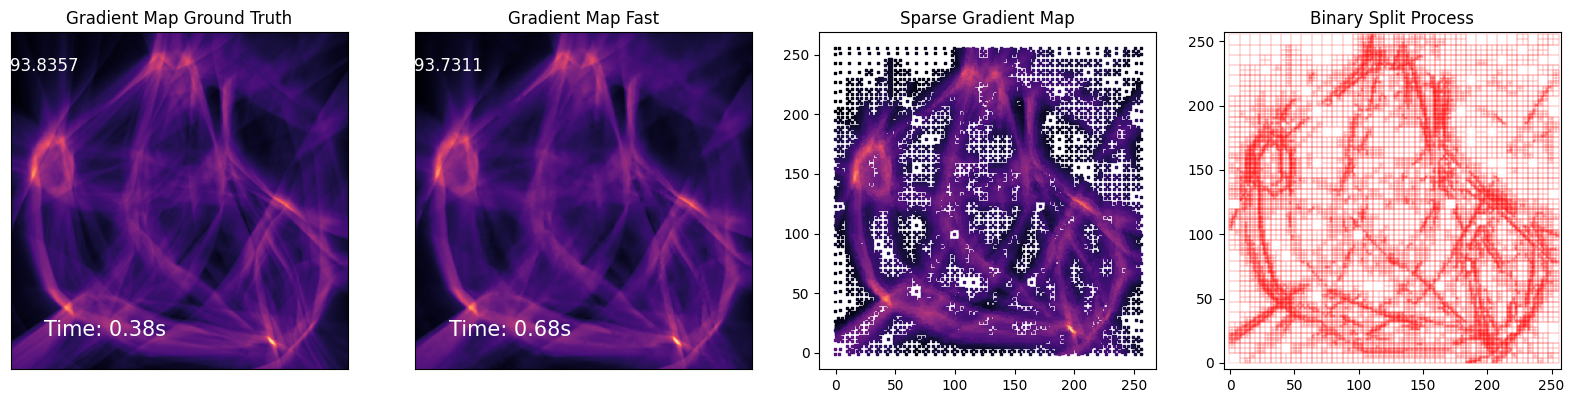

In [12]:
conten_list = ['label', 'gradient_reduced', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# GRID = 256

# threshold = 0.2
# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
time0 = time.time()
_, sparse = builder.plot_gradient_map(ax[0],  fast=False, grid=GRID)

time1 = time.time()
print(time1-time0)
_, sparse = builder.plot_gradient_map(ax[1],  fast=True, grid=GRID, initial_resolution=32, threshold=threshold, reduced=True) ## threshold at most 0.2
time2 = time.time()
print(time2-time1)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

ax[0].set_title('Gradient Map Ground Truth')
ax[1].set_title('Gradient Map Fast')
ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

ax[2].set_title('Sparse Gradient Map')
ax[2].set_aspect('equal')
ax[3].set_title('Binary Split Process')
ax[3].set_aspect('equal')

threshold = 0
for item in sparse:
    if item[-2] > threshold and item[-1] > threshold:
        w, h = item[-1], item[-2]
        ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
        # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
        # ax.set_xlim(0, GRID)
        # ax.set_ylim(0, GRID)
    # else:
    #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
ax[3].set(xlim=(0-5, GRID+1), ylim=(0-5, GRID+1))


In [13]:
# conten_list = ['label', 'gradient', 'label_roundtirp']
# fast_strategy = True
# fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# builder.plot_dist_map(ax[0],  fast=False, grid=256)
# builder.plot_training_data(ax=ax[0])
# _, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=16)
# # builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# # fig.savefig('figures/spares.png', dpi=300)


In [14]:
# conten_list = ['label', 'gradient', 'label_roundtirp']
# fast_strategy = True
# fig, ax = plt.subplots(1, 4, figsize=(20, 5))
# GRID = 256

# time0 = time.time()
# builder.plot_dist_map(ax[0],  fast=False, grid=GRID, content='nearest')
# time1 = time.time()
# # builder.plot_training_data(ax=ax[0])
# _, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=GRID, initial_resolution=32, content='nearest', threshold=0.5)
# time2 = time.time()
# # builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
# ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# ax[0].text(0.1, 0.1, 'Time: {:.2f}s'.format(time1-time0), fontsize=15, color='w')
# ax[1].text(0.1, 0.1, 'Time: {:.2f}s'.format(time2-time1), fontsize=15, color='w')

# ax[2].set_title('Sparse Gradient Map')
# ax[2].set_aspect('equal')
# ax[3].set_title('Binary Split Process')
# ax[3].set_aspect('equal')

# threshold = 0
# for item in sparse:
#     if item[-2] > threshold and item[-1] > threshold:
#         w, h = item[-1], item[-2]
#         ax[3].add_patch(Rectangle((item[0]-w/2, item[1]-h/2), w, h, fill=None, edgecolor='r', lw=0.1))
#         # ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='.', k='w')
#         # ax.set_xlim(0, GRID)
#         # ax.set_ylim(0, GRID)
#     # else:
#     #     ax[2].scatter(item[0], item[1], c=item[3], s=1, marker='s')
# ax[3].set(xlim=(-1, GRID), ylim=(-1, GRID))

# # fig.savefig('figures/near2neighor.pdf', dpi=300)
